In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker


# plt.style.use("bmh")
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.grid'] = True
# plt.rcParams.keys()

# Dicroico

In [49]:
df_P = pd.read_excel("../mediciones/Thorlabs/DMLP567.xlsx", sheet_name= "P-Polarized", skiprows= 1)
df_S = pd.read_excel("../mediciones/Thorlabs/DMLP567.xlsx", sheet_name= "S-Polarized", skiprows= 1)

In [50]:
df_P["W"] = df_P["Wavelength (nm)"]
df_P["T"] = df_P["%Transmission "]
df_P["R"] = df_P["% Reflectance"]

df_S["W"] = df_S["Wavelength (nm)"]
df_S["T"] = df_S["% Transmission "]
df_S["R"] = df_S["% Reflectance"]

df_P = df_P.filter(["W","T", "R"])
df_S = df_S.filter(["W","T", "R"])
df_P

,W,T,R
0,250,1.565500,0.590555
1,251,0.146769,1.312648
2,252,1.256713,1.135378
3,253,1.370426,1.527811
4,254,0.095934,3.300132
...,...,...,...
2246,2496,86.150572,6.978553
2247,2497,86.002415,6.999900
2248,2498,85.895201,7.025075
2249,2499,85.789640,7.047015


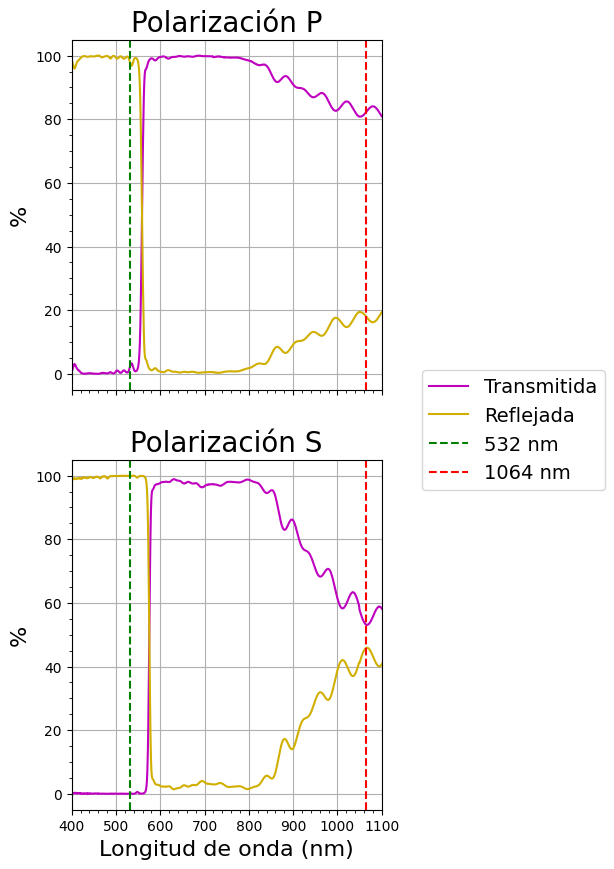

In [63]:
fig, axs = plt.subplots(nrows = 2, figsize = (4,10))

axs[0].set_title("Polarización P", fontsize = 20)
axs[0].plot(df_P["W"], df_P["T"], c = "m")
axs[0].plot(df_P["W"], df_P["R"], c = "#D1AF00")
# axs[0].set_xlabel("Longitud de onda (nm)")
axs[0].set_ylabel("%")
axs[0].set_xlim([400,1100])
axs[0].axvline(532, ls = "--", color = "g")
axs[0].axvline(1064, ls = "--", color = "r")
# axs[0].legend(fontsize = 14)
plt.setp(axs[0].get_xticklabels(), visible=False)

axs[1].set_title("Polarización S", fontsize = 20)
axs[1].plot(df_S["W"], df_S["T"], label = "Transmitida", c = "m")
axs[1].plot(df_S["W"], df_S["R"], label = "Reflejada", c = "#D1AF00")
axs[1].set_xlabel("Longitud de onda (nm)")
axs[1].set_ylabel("%")
axs[1].set_xlim([400,1100])
axs[1].axvline(532, ls = "--", color = "g", label = "532 nm")
axs[1].axvline(1064, ls = "--", color = "r", label = "1064 nm")
fig.legend(fontsize = 14,bbox_to_anchor=(1, 0.55), loc='upper left', borderaxespad=0)
plt.show()

# Responsitivity FDS100

In [52]:
df_pho = pd.read_excel("../mediciones/Thorlabs/FDS100_Res_data.xlsx", skiprows= 1)

In [53]:
df_pho["W"] = df_pho["Wavelength (nm)"]
df_pho["R"] = df_pho["Responsivity (A/W)"][:-1]
df_pho = df_pho.filter(["W", "R"])

df_pho

,W,R
0,350.0,0.045
1,360.0,0.045
2,370.0,0.046
3,380.0,0.048
4,390.0,0.054
...,...,...
72,1070.0,0.264
73,1080.0,0.216
74,1090.0,0.175
75,1100.0,0.140


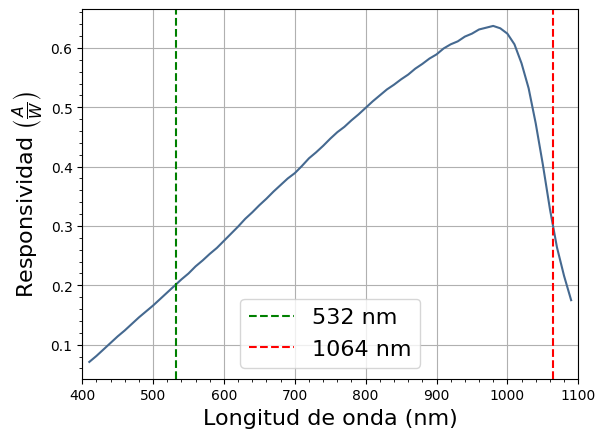

In [70]:
df_reduced = df_pho[(df_pho["W"] > 400) & (df_pho["W"] < 1100)]

plt.plot(df_reduced["W"], df_reduced["R"], c = "#456990")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel(r"Responsividad $\left(\frac{A}{W}\right)$")
plt.xlim([400,1100])
plt.axvline(532, ls = "--", color = "g", label = "532 nm")
plt.axvline(1064, ls = "--", color = "r", label = "1064 nm")
plt.legend(loc = "best")
plt.show()